In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [37]:
# read json file as pandas dataframe
data = pd.read_json("../data/trades.json")
data.set_index('timestamp', inplace=True)
data["costs"] = data["price"] * data["quantity"]

In [38]:
data.tail()

,buyer,seller,symbol,currency,price,quantity,costs
timestamp,,,,,,,
99600,,,STARFRUIT,SEASHELLS,5056,12,60672
99700,SUBMISSION,,AMETHYSTS,SEASHELLS,9996,1,9996
99700,,,AMETHYSTS,SEASHELLS,9996,1,9996
99700,,,STARFRUIT,SEASHELLS,5050,2,10100
99900,,,STARFRUIT,SEASHELLS,5051,1,5051


In [30]:
data.head(3)

,buyer,seller,symbol,currency,price,quantity,costs
timestamp,,,,,,,
0,SUBMISSION,,STARFRUIT,SEASHELLS,5043,20,100860
100,,SUBMISSION,AMETHYSTS,SEASHELLS,10002,1,10002
100,,,STARFRUIT,SEASHELLS,5042,1,5042


In [39]:
# get all trades we sold
amethysts = data[data['symbol'] == 'AMETHYSTS']
starfruit = data[data['symbol'] == 'STARFRUIT']
sold_AMETHYSTS = amethysts[amethysts['seller'] == 'SUBMISSION']
bought_AMETHYSTS = amethysts[amethysts['buyer'] == 'SUBMISSION']
sold_STARFRUIT = starfruit[starfruit['seller'] == 'SUBMISSION']
bought_STARFRUIT = starfruit[starfruit['buyer'] == 'SUBMISSION']

In [40]:
print("Amethysts:")
print(f"# Bought: {bought_AMETHYSTS['quantity'].sum()} for a price of average {bought_AMETHYSTS['price'].mean()}. Total Costs: {bought_AMETHYSTS['costs'].sum()}")
print(f"# Bought Price Range: {bought_AMETHYSTS['price'].min()} - {bought_AMETHYSTS['price'].max()}")
print(f"# Sold: {sold_AMETHYSTS['quantity'].sum()} for a price of average {sold_AMETHYSTS['price'].mean()}. Total Costs: {sold_AMETHYSTS['costs'].sum()}")
print(f"# Sold Price Range: {sold_AMETHYSTS['price'].min()} - {sold_AMETHYSTS['price'].max()}")
amethysts_quantity = bought_AMETHYSTS['quantity'].sum() - sold_AMETHYSTS['quantity'].sum()
amethysts_profit = sold_AMETHYSTS['costs'].sum() - bought_AMETHYSTS['costs'].sum()
amethysts_mid_price = 10001.0
amethysts_profit += (amethysts_quantity * amethysts_mid_price)
print(f"# End day with quantity: {amethysts_quantity}. Need to sell/buy for {amethysts_mid_price}")
print(f"# Profit of {amethysts_profit}")

print("STARFRUIT:")
print(f"# Bought: {bought_STARFRUIT['quantity'].sum()} for a price of average {bought_STARFRUIT['price'].mean()}. Total Costs: {bought_STARFRUIT['costs'].sum()}")
print(f"# Bought Price Range: {bought_STARFRUIT['price'].min()} - {bought_STARFRUIT['price'].max()}")
print(f"# Sold: {sold_STARFRUIT['quantity'].sum()} for a price of average {sold_STARFRUIT['price'].mean()}. Total Costs: {sold_STARFRUIT['costs'].sum()}")
print(f"# Sold Price Range: {sold_STARFRUIT['price'].min()} - {sold_STARFRUIT['price'].max()}")
startfruit_quantity = bought_STARFRUIT['quantity'].sum() - sold_STARFRUIT['quantity'].sum()
startfuit_profit = sold_STARFRUIT['costs'].sum() - bought_STARFRUIT['costs'].sum()
startfruit_mid_price = 5050.5
startfuit_profit += (startfruit_quantity * startfruit_mid_price)
print(f"# End day with quantity: {startfruit_quantity}. Need to sell/buy for {startfruit_mid_price}")
print(f"# Profit of {startfuit_profit}")

print(f"Total Profit: {amethysts_profit + startfuit_profit}")

Amethysts:
# Bought: 114 for a price of average 9997.649122807017. Total Costs: 1139756
# Bought Price Range: 9996 - 10000
# Sold: 97 for a price of average 10002.589041095891. Total Costs: 970237
# Sold Price Range: 10002 - 10004
# End day with quantity: 17. Need to sell/buy for 10001.0
# Profit of 498.0
STARFRUIT:
# Bought: 132 for a price of average 5038.411764705882. Total Costs: 665171
# Bought Price Range: 5030 - 5043
# Sold: 152 for a price of average 5042.428571428572. Total Costs: 766394
# Sold Price Range: 5034 - 5048
# End day with quantity: -20. Need to sell/buy for 5050.5
# Profit of 213.0
Total Profit: 711.0


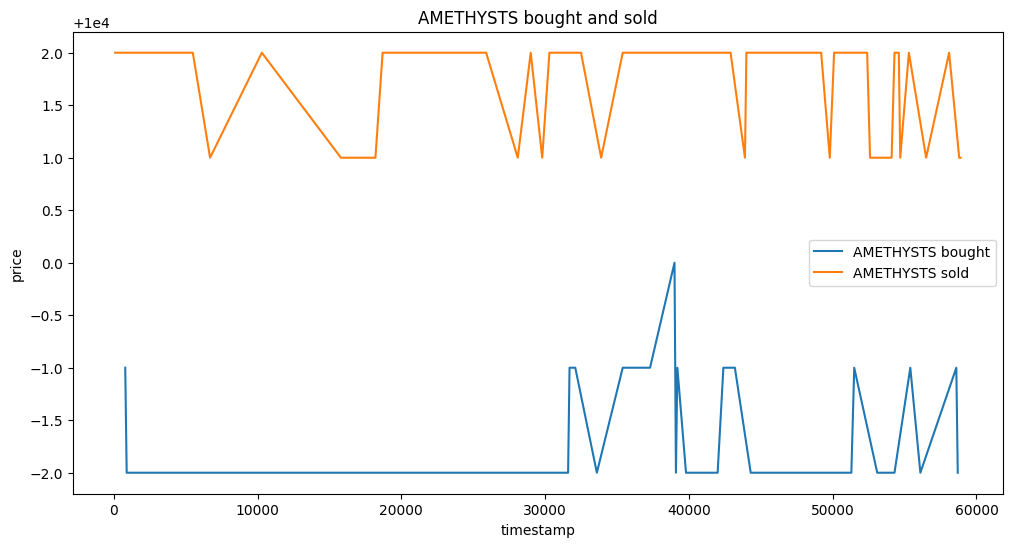

In [5]:
# draw a plot of the price by timestamp for amethysts bought and sold
plt.figure(figsize=(12, 6))
plt.plot(bought_AMETHYSTS.index, bought_AMETHYSTS['price'], label='AMETHYSTS bought')
plt.plot(sold_AMETHYSTS.index, sold_AMETHYSTS['price'], label='AMETHYSTS sold')
plt.legend()
plt.title('AMETHYSTS bought and sold')
plt.xlabel('timestamp')
plt.ylabel('price')
plt.show()


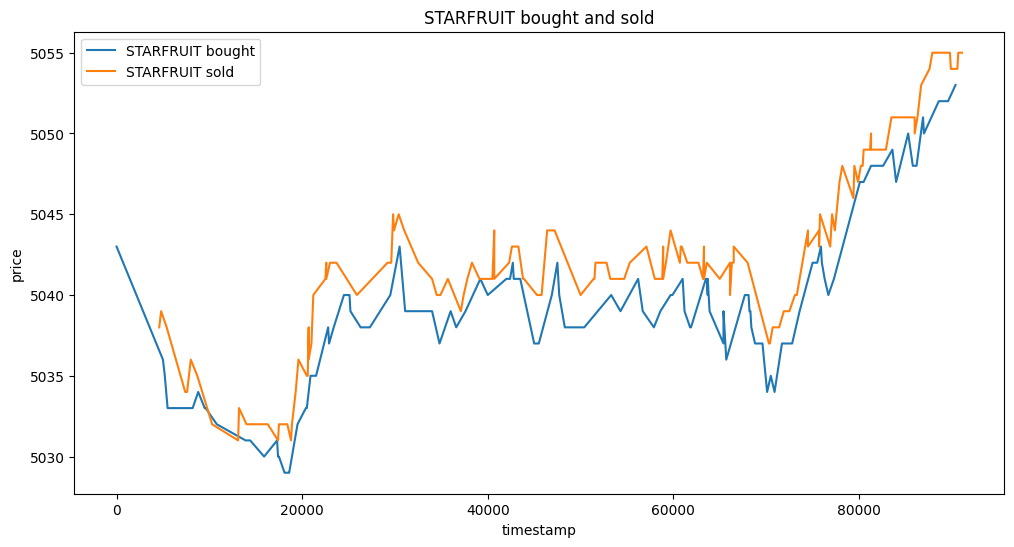

In [6]:
# same for starfruit
plt.figure(figsize=(12, 6))
plt.plot(bought_STARFRUIT.index, bought_STARFRUIT['price'], label='STARFRUIT bought')
plt.plot(sold_STARFRUIT.index, sold_STARFRUIT['price'], label='STARFRUIT sold')
plt.legend()
plt.title('STARFRUIT bought and sold')
plt.xlabel('timestamp')
plt.ylabel('price')
plt.show()
